## 1. Importing Required Libraries:

In [1]:
# Importing essential libraries

import pandas as pd       # DataFrames, data loading
import numpy as np        # Mathematical operations, arrays

# Visualization libraries
import seaborn as sns    
import matplotlib.pyplot as plt
import scipy.stats as stats        

# Scikit-learn utilities

from sklearn.model_selection import train_test_split       # Splits dataset into training and testing sets

from sklearn.preprocessing import PowerTransformer        # Used for transforming features (Box-Cox, Yeo-Johnson) to make data more normal

from sklearn.model_selection import cross_val_score       # Runs cross-validation and returns scores

# Performance evaluation metrics
from sklearn.metrics import (
    r2_score,
    mean_squared_error,
    root_mean_squared_error
)

from sklearn.model_selection import GridSearchCV          # Hyperparameter tuning using grid search + cross-validation

from sklearn.linear_model import LinearRegression, Ridge  # Linear regression models (ordinary and ridge regularized)

## 2. EDA:

In [2]:
wine=pd.read_csv('winequality-red.csv',sep=';')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.shape

(1599, 12)

In [5]:
#For checking,data contains null values or not(missing values)
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
#Finding the number of duplicated rows
wine.duplicated().sum()

np.int64(240)

### Dropping the duplicate rows:

#### (i). Use in_built function

In [7]:
#Now,drop the duplicated_rows
wine=wine.drop_duplicates()

In [8]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#### (ii).You can create own code for drop the duplicated rows:

In [9]:
# #For checking which rows are duplicated and store in duplicated rows

# duplicated_rows=[]
# actual_rows=[]
# for i in range(len(wine)):
#     if wine.duplicated().values[i]:
#         duplicated_rows.append(i)
#     else:
#         actual_rows.append(i)
# print("Duplicated rows number:")
# print(duplicated_rows)

# #Now,We want only actual rows in our wine dataset
# wine=wine.iloc[actual_rows]

In [10]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## 3. Features Engineering:

### --> train/test split - 70:30

In [11]:
X=wine.drop(columns=['quality'])
y=wine['quality']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [12]:
X_train

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
374,14.0,0.41,0.63,3.8,0.089,6.0,47.0,1.00140,3.01,0.81,10.8
1225,9.2,0.46,0.23,2.6,0.091,18.0,77.0,0.99922,3.15,0.51,9.4
363,12.5,0.46,0.63,2.0,0.071,6.0,15.0,0.99880,2.99,0.87,10.2
1426,7.7,0.23,0.37,1.8,0.046,23.0,60.0,0.99710,3.41,0.71,12.1
89,7.0,0.62,0.08,1.8,0.076,8.0,24.0,0.99780,3.48,0.53,9.0
...,...,...,...,...,...,...,...,...,...,...,...
1285,11.3,0.37,0.50,1.8,0.090,20.0,47.0,0.99734,3.15,0.57,10.5
1329,7.4,0.60,0.26,2.1,0.083,17.0,91.0,0.99616,3.29,0.56,9.8
1526,6.8,0.47,0.08,2.2,0.064,18.0,38.0,0.99553,3.30,0.65,9.6
1011,8.9,0.32,0.31,2.0,0.088,12.0,19.0,0.99570,3.17,0.55,10.4


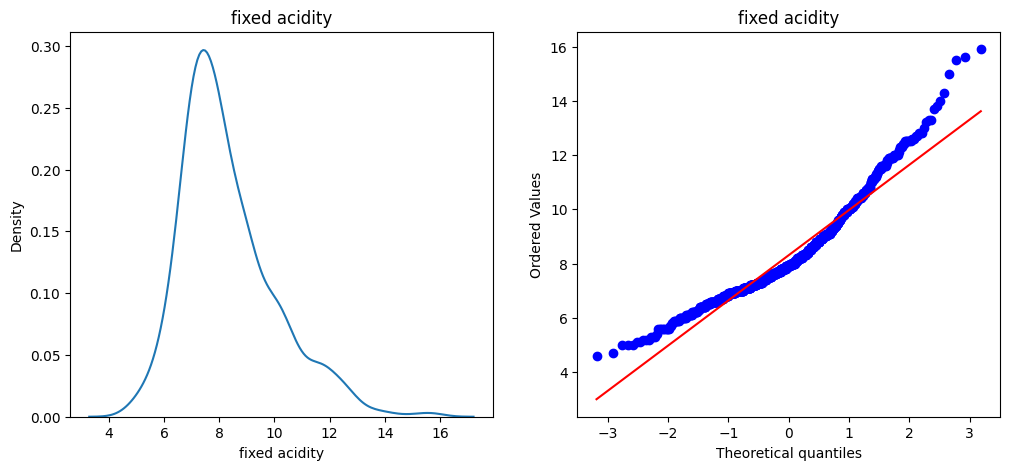

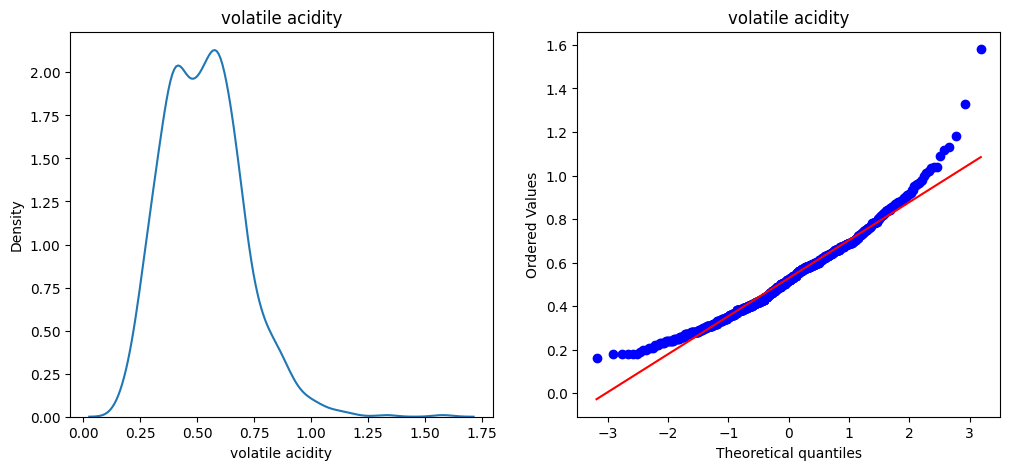

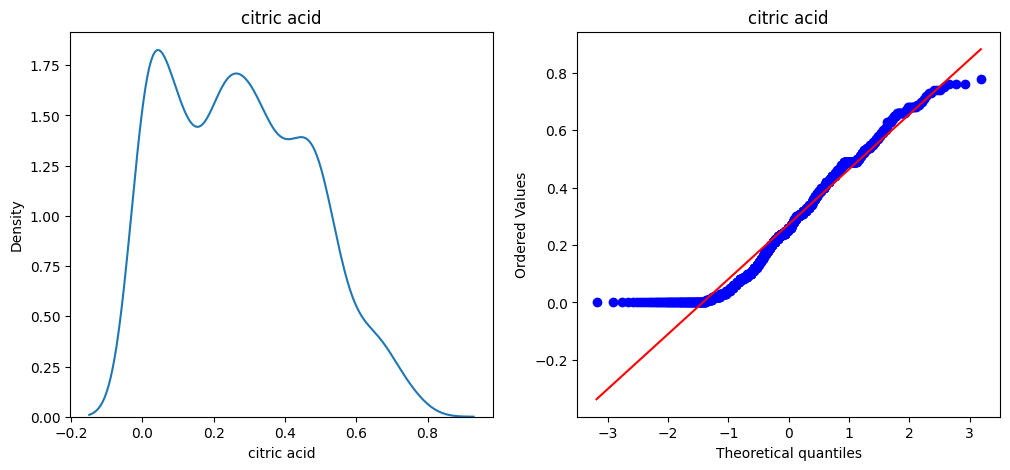

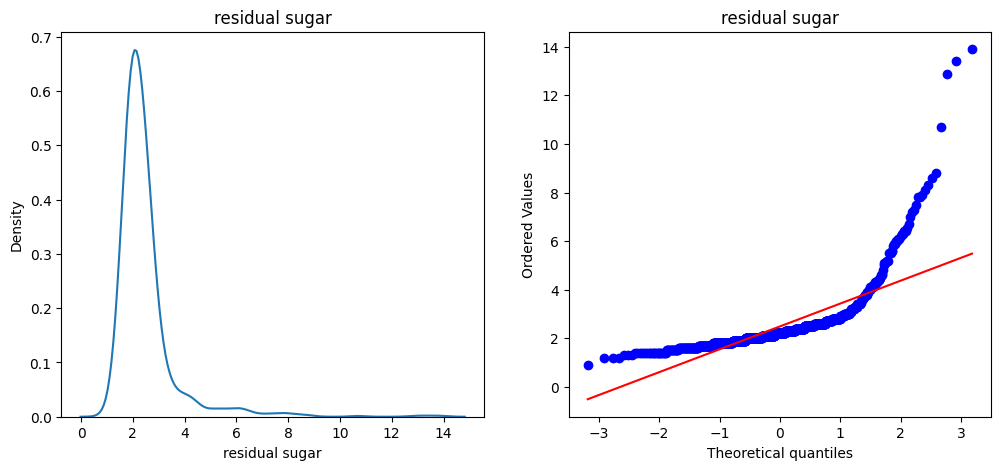

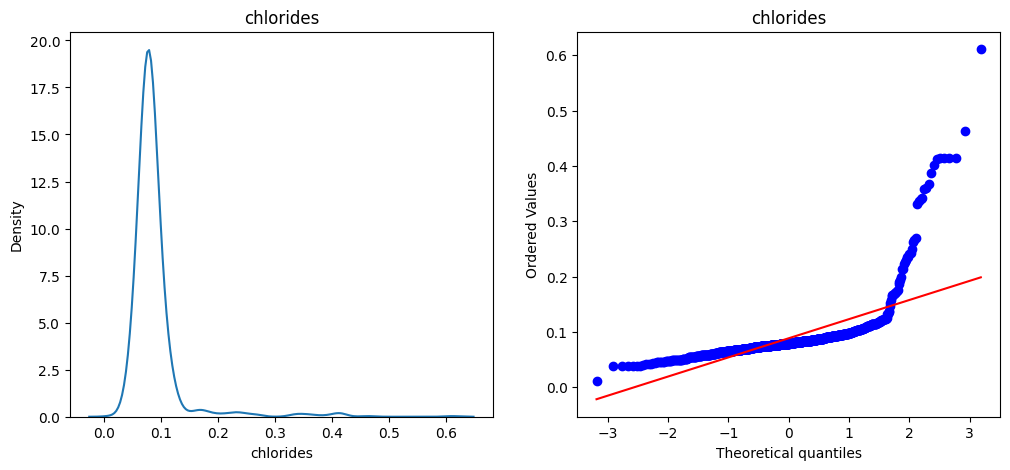

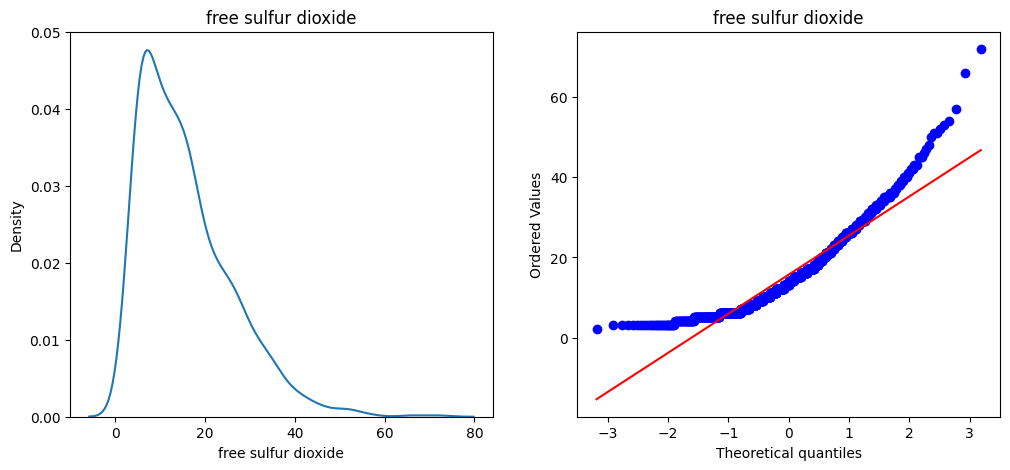

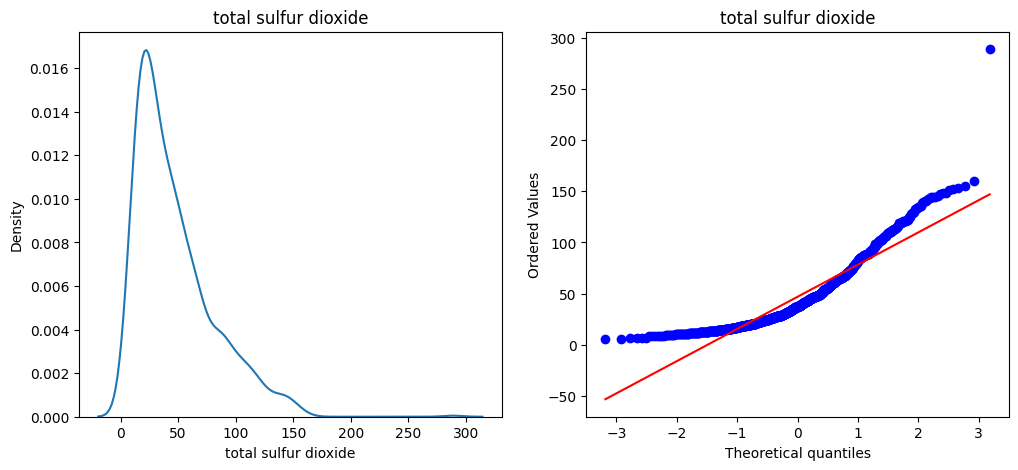

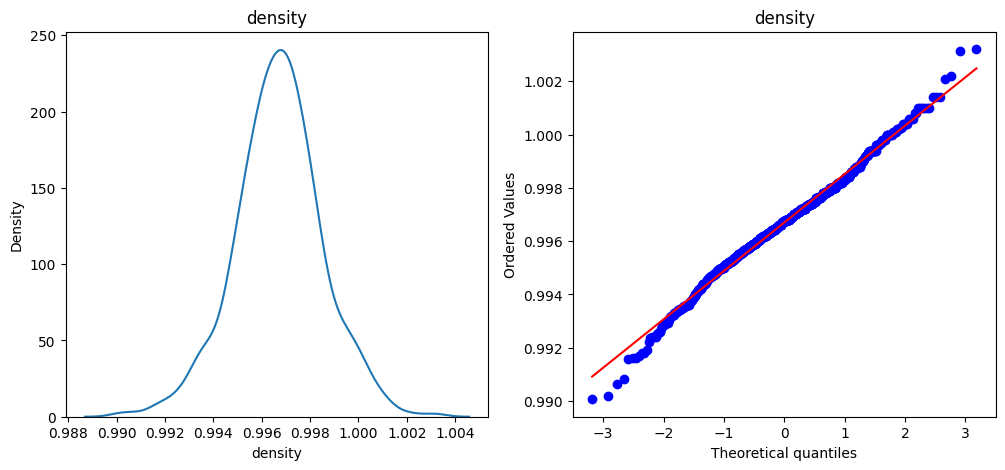

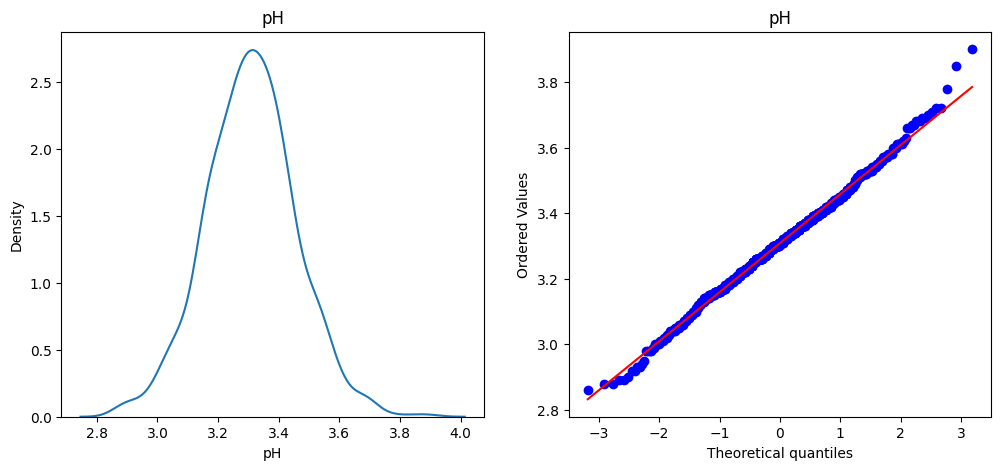

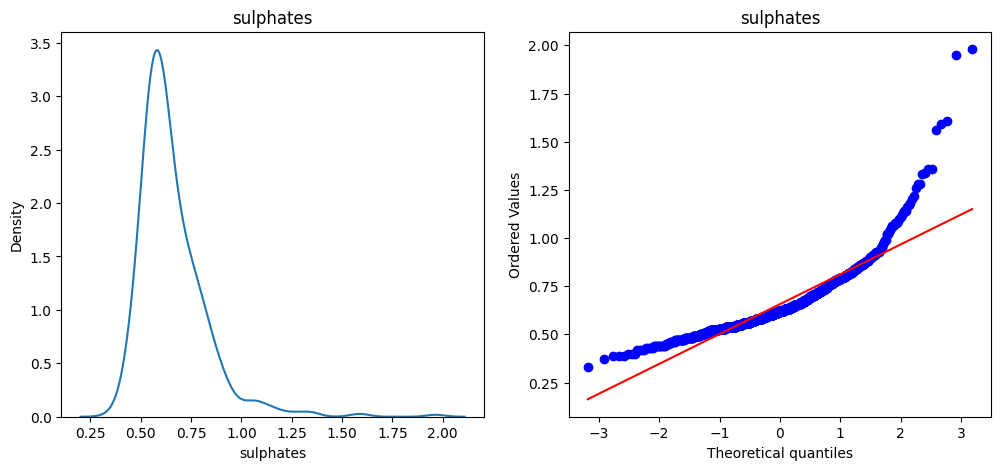

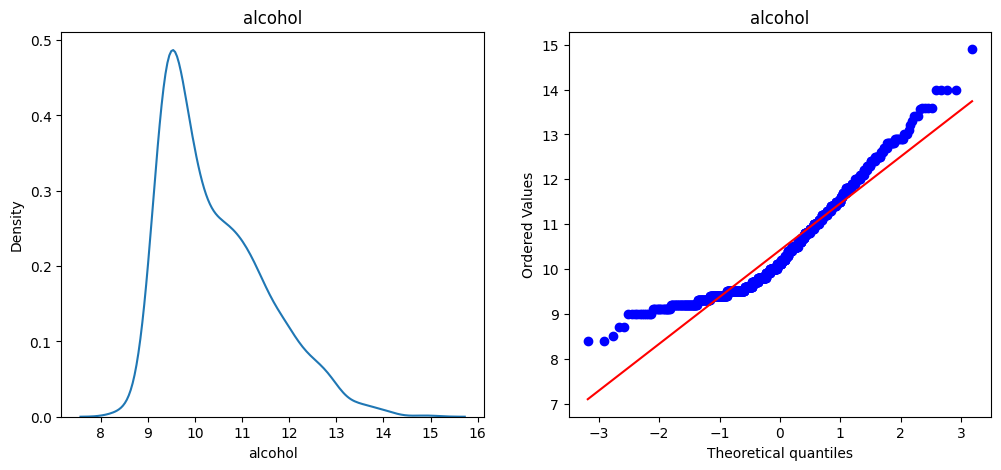

In [13]:
#Finding that which data of columns are normally distributed so for this, plot the 'kde' plot and 'QQ' plot

for column in X_train.columns:
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    sns.kdeplot(X_train[column])
    plt.title(column)

    plt.subplot(122)
    stats.probplot(X_train[column],dist='norm',plot=plt)
    plt.title(column)

In [14]:
#PowerTransformer() -It apply 'Standarization' internally and we also want that all values should be on the same scale and It also makes data 
                    # to normally distributed data and we know some ML algorithms(LR,KNN etc) are works very good on normally distributed data.  

pt=PowerTransformer(standardize=True)
X_train_transformed=pt.fit_transform(X_train)
X_test_transformed=pt.transform(X_test)

pd.DataFrame({'cols':X_train.columns,'yeo_johnson_lambdas':pt.lambdas_})

,cols,yeo_johnson_lambdas
0,fixed acidity,-0.919303
1,volatile acidity,-0.915536
2,citric acid,-0.346289
3,residual sugar,-1.991114
4,chlorides,-18.806344
5,free sulfur dioxide,0.040974
6,total sulfur dioxide,0.008236
7,density,24.456145
8,pH,0.345458
9,sulphates,-4.139252


In [15]:
#Convert into dataframe
X_train_transformed=pd.DataFrame(X_train_transformed,columns=X_train.columns)
X_test_transformed=pd.DataFrame(X_test_transformed,columns=X_test.columns)

In [16]:
X_train_transformed

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2.386509,-0.632202,1.652808,1.537417,0.425970,-1.114349,0.338724,2.649325,-2.035822,1.136163,0.579101
1,0.675107,-0.305284,-0.121548,0.570847,0.507033,0.498759,1.039986,1.397365,-1.064474,-1.102427,-1.055028
2,1.977470,-0.305284,1.652808,-0.399290,-0.453835,-1.114349,-1.237786,1.159818,-2.176389,1.389178,-0.001132
3,-0.227656,-2.018934,0.578271,-0.868555,-2.282377,0.885783,0.684554,0.210192,0.684024,0.604732,1.441591
4,-0.759623,0.610535,-1.001377,-0.868555,-0.179613,-0.714548,-0.599084,0.598921,1.143190,-0.877551,-1.747840
...,...,...,...,...,...,...,...,...,...,...,...
946,1.581584,-0.910169,1.146913,-0.868555,0.466870,0.664111,0.338724,0.343111,-1.064474,-0.470516,0.307396
947,-0.445221,0.505662,0.037169,-0.197880,0.164292,0.409714,1.279064,-0.306812,-0.114346,-0.567281,-0.480648
948,-0.928412,-0.242459,-1.001377,-0.015003,-0.882977,0.498759,0.039667,-0.650133,-0.047261,0.200796,-0.754650
949,0.515586,-1.280285,0.290703,-0.399290,0.384320,-0.122088,-0.918728,-0.557741,-0.927470,-0.667287,0.208927


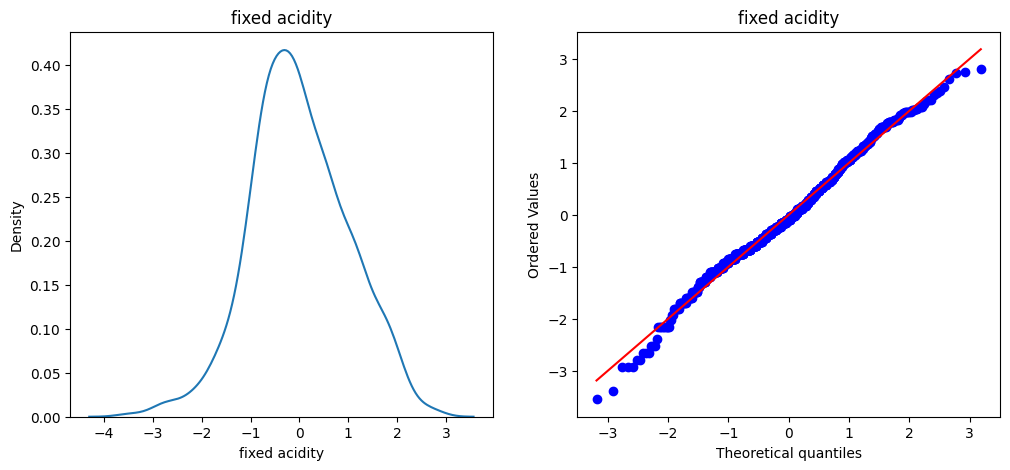

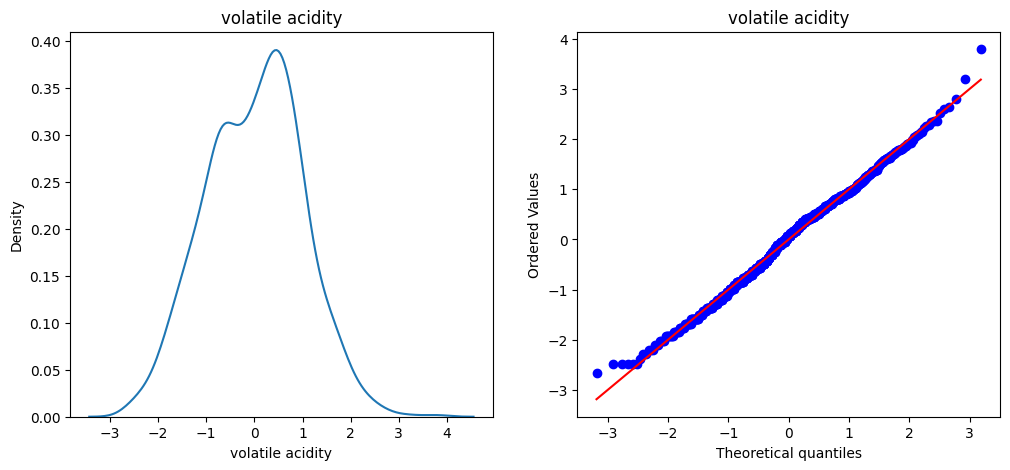

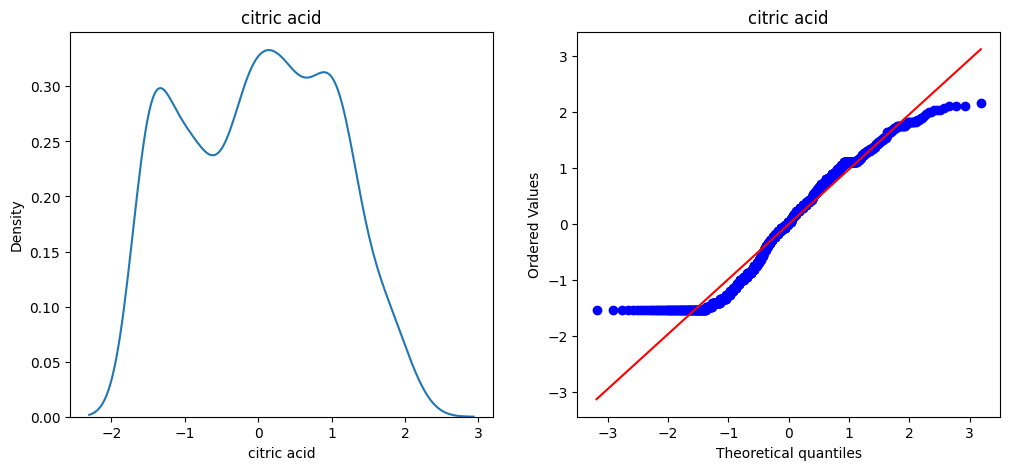

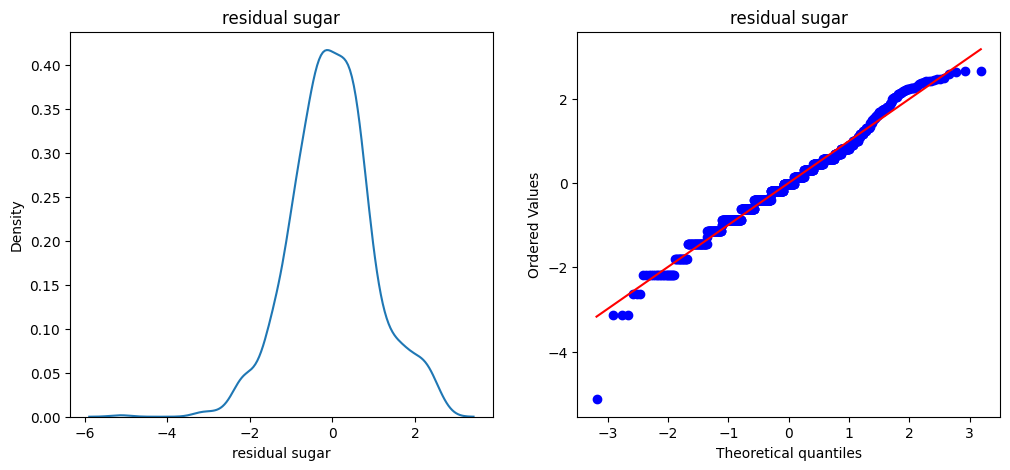

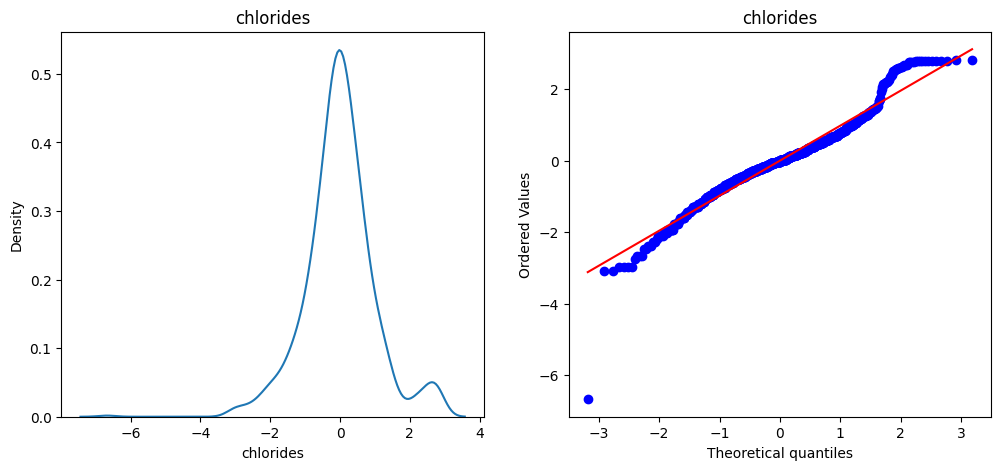

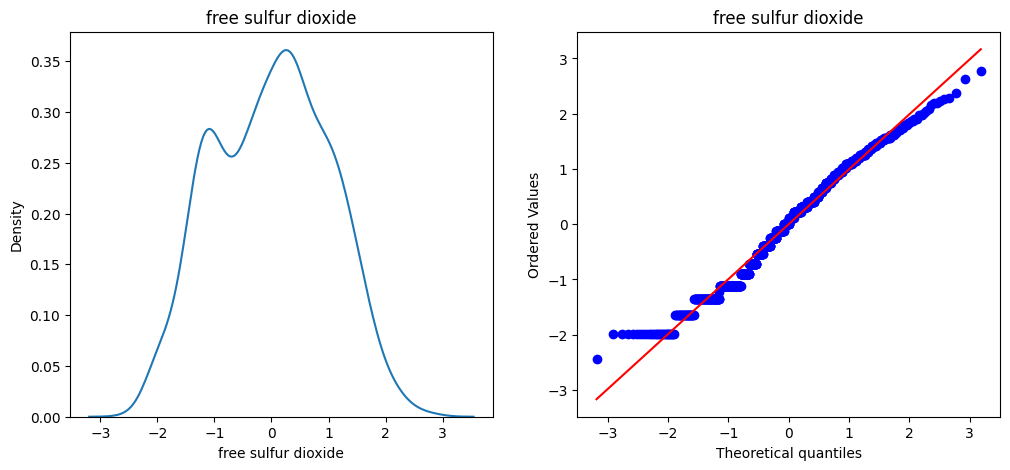

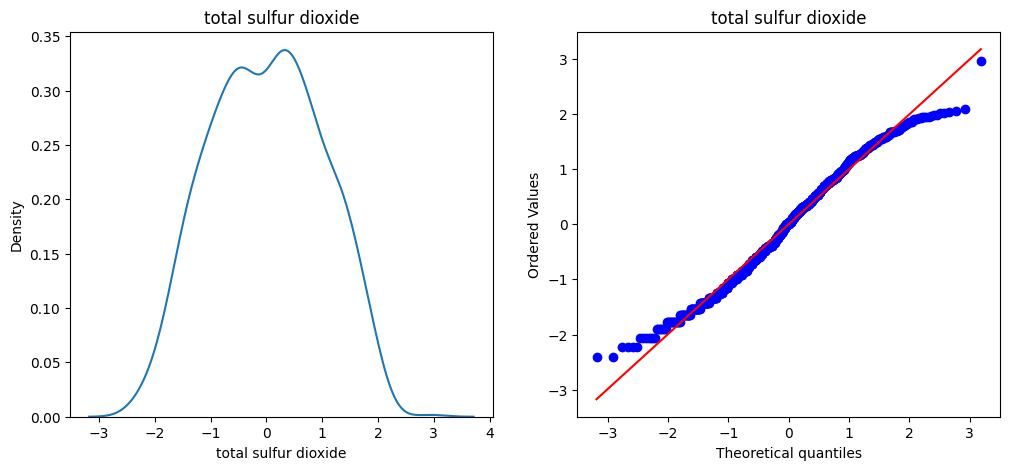

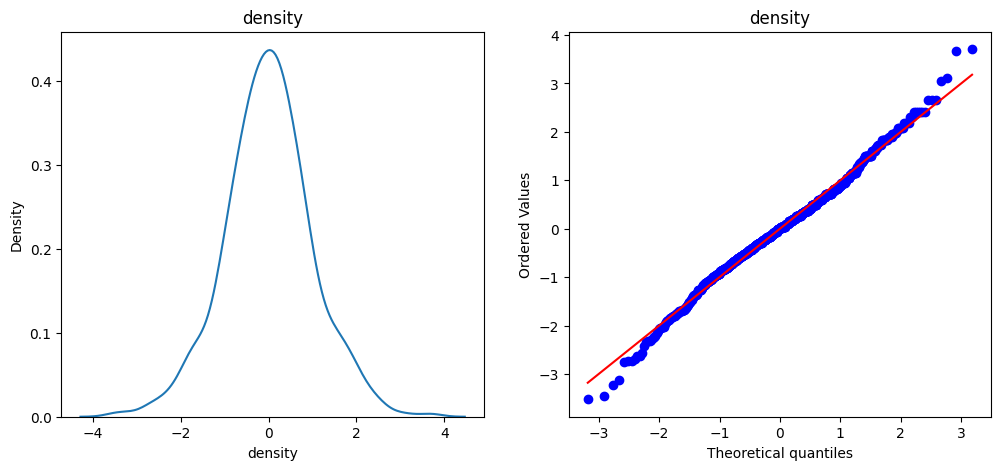

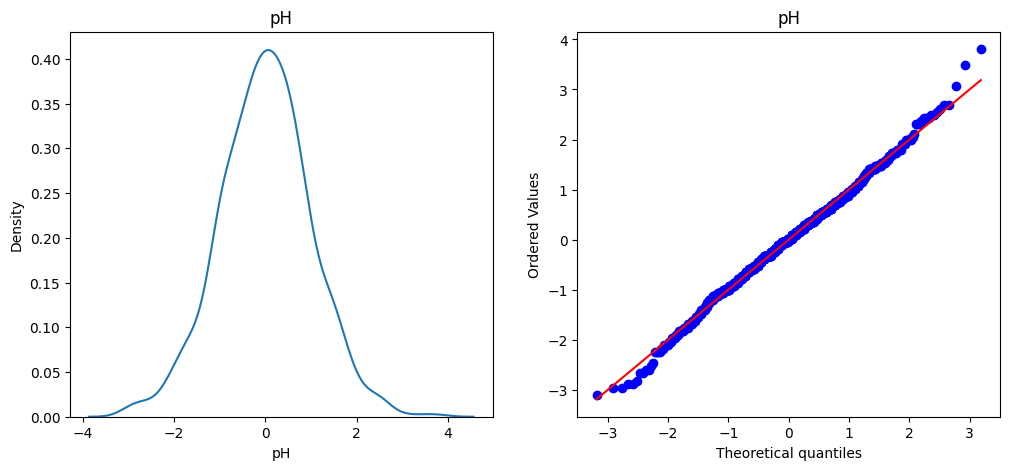

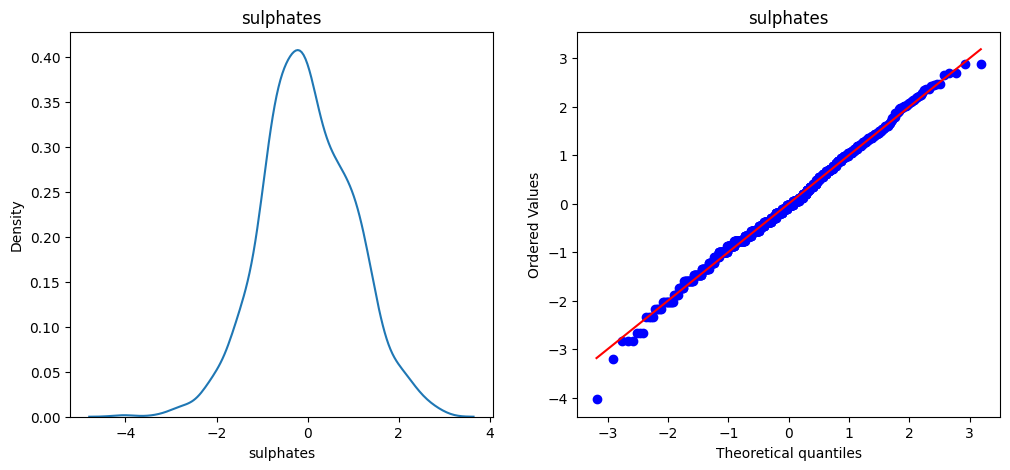

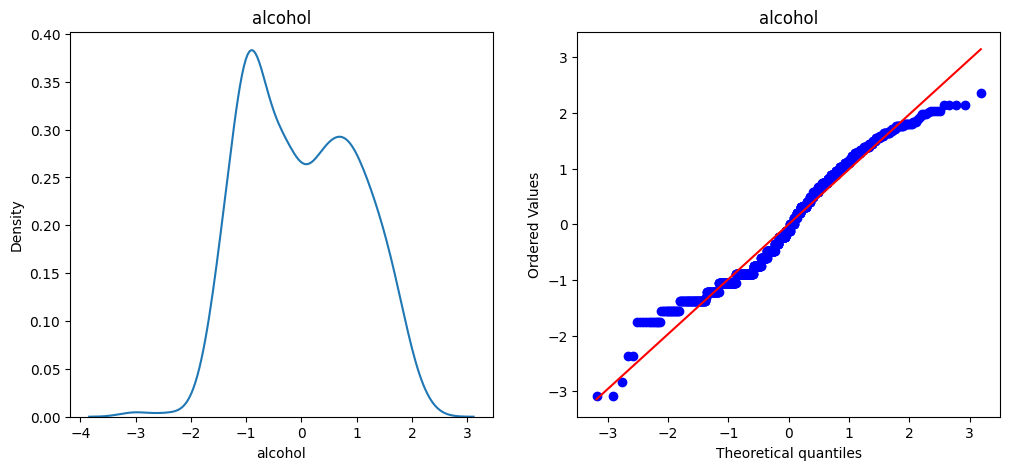

In [17]:
#Kde and QQ plot after applying powertransformation(Including Standarization)
for column in X_train.columns:
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    sns.kdeplot(X_train_transformed[column])
    plt.title(column)

    plt.subplot(122)
    stats.probplot(X_train_transformed[column],dist='norm',plot=plt)
    plt.title(column)

## 4. Implement KNN Regressor from scratch:

#### In this code,you can use any combination with three distances and also uniform & distance weighting KNN

In [18]:
class KnnRegressor:
    def __init__(self, k=5, distance_type='euclidean', p=2, weighting='uniform'):
        self.n_neighbors = k
        self.p = p
        self.distance_type = distance_type
        self.weighting = weighting          # 'uniform' or 'distance'
        self.X_train = None
        self.y_train = None

    # sklearn requires this
    def get_params(self, deep=True):
        return {
            "k": self.n_neighbors,
            "distance_type": self.distance_type,
            "p": self.p,
            "weighting": self.weighting
        }

    # sklearn requires this
    def set_params(self, **params):
        for param, value in params.items():
            if param == 'k':
                self.n_neighbors = value
            else:
                setattr(self, param, value)
        return self

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def predict(self, X_test):
        X_test = np.array(X_test)
        y_pred = []

        for test_point in X_test:

            # Compute all distances
            distances = []
            for train_point in self.X_train:
                dis = self.calculate_distance(test_point, train_point)
                distances.append(dis)
            distances = np.array(distances)

            # Get k nearest neighbors
            neighbor_indices = np.argsort(distances)[:self.n_neighbors]

            # Predict value
            prediction = self.regression_predict(neighbor_indices, distances)
            y_pred.append(prediction)

        return np.array(y_pred)

    def calculate_distance(self, A, B):
        if self.distance_type == 'euclidean':
            return np.linalg.norm(A - B)
        elif self.distance_type == 'manhattan':
            return np.sum(np.abs(A - B))
        elif self.distance_type == 'minkowski':
            return np.power(np.sum(np.abs(A - B)**self.p), 1/self.p)
        else:
            raise ValueError(f"Unknown distance_type='{self.distance_type}'")

    def regression_predict(self, neighbor_indices, distances):
        neighbor_vals = np.array([self.y_train[i] for i in neighbor_indices])

        if self.weighting == "uniform":
            # All neighbors equal
            return np.mean(neighbor_vals)

        elif self.weighting == "distance":
            # Inverse-distance weighting
            d = distances[neighbor_indices]
            # Avoid division by zero (if distance=0)
            weights = 1 / (d + 1e-8)
            return np.sum(weights * neighbor_vals) / np.sum(weights)

        else:
            raise ValueError("weighting must be 'uniform' or 'distance'")

In [19]:
knn1=KnnRegressor(k=14,distance_type='euclidean',weighting='distance',p=2)
# You can try it with different combination also 

In [20]:
knn1.fit(X_train_transformed,y_train)

In [21]:
y_pred1=knn1.predict(X_test_transformed)

In [22]:
y_pred1

array([5.13013   , 5.98455959, 6.59029009, 5.25370997, 5.61973273,
       6.48651828, 5.27713834, 4.99979767, 5.94756897, 5.48488524,
       6.45821931, 6.27319211, 5.81598615, 5.42251432, 6.55973533,
       5.        , 5.70951412, 5.11781724, 5.18875906, 5.89745922,
       5.33337863, 5.96419117, 5.05964212, 5.15954187, 5.71504676,
       5.06228377, 5.60184408, 5.45944673, 5.38159084, 5.33779957,
       5.93336372, 6.47803692, 5.80536732, 4.9312569 , 5.55548967,
       6.17809055, 5.16369915, 5.83534144, 5.74364647, 5.95102349,
       5.21687665, 5.69103692, 6.17379337, 5.        , 5.33335677,
       5.28623718, 5.04374173, 5.21467071, 4.98287469, 6.29938258,
       6.00936021, 5.8527173 , 6.05192649, 5.55163581, 6.39265073,
       5.12754534, 5.75978003, 4.94594983, 5.21451188, 5.10765868,
       5.25960505, 6.0734203 , 5.47351468, 6.0741384 , 5.70640979,
       6.23508089, 5.25859761, 5.28356304, 6.00625957, 6.09171668,
       5.23524571, 6.64770559, 5.75564596, 6.15051646, 5.91938

In [23]:
print("R2 Score of KNN Regressor:",r2_score(y_test,y_pred1))
print("MSE of KNN Regressor:",mean_squared_error(y_test,y_pred1))
print("RMSE of KNN Regressor:",root_mean_squared_error(y_test,y_pred1))
print("Cross Validation Score:",np.mean(cross_val_score(knn1,X_train_transformed,y_train,scoring='r2',cv=15)))

R2 Score of KNN Regressor: 0.4002755396486274
MSE of KNN Regressor: 0.40586528667389876
RMSE of KNN Regressor: 0.6370755737539298
Cross Validation Score: 0.3048128635884346


## 5. Hypertuning of k:

In [24]:
# knn = KnnRegressor()

param_grid = {
    'n_neighbors': [1, 5, 9, 13, 17, 21, 25, 29, 33 , 37]
}

grid = GridSearchCV(knn1, param_grid, cv=5, scoring='r2')
grid.fit(X_train_transformed, y_train)

print("Best k:", grid.best_params_)
print("Best score:", grid.best_score_)


Best k: {'n_neighbors': 25}
Best score: 0.3282701283464921


## 6. Comparison with Other Model:

### (i). Linear Regression:

In [25]:
lr=LinearRegression()
lr.fit(X_train_transformed,y_train)
y_pred_lr=lr.predict(X_test_transformed)

In [26]:
print("R2 Score of Linear Regression",r2_score(y_test,y_pred_lr))
print("MSE Score of Linear Regression",mean_squared_error(y_test,y_pred_lr))
print("RMSE Score of Linear Regression",root_mean_squared_error(y_test,y_pred_lr))
print("Cross Validation Score:",np.mean(cross_val_score(lr,X_train_transformed,y_train,scoring='r2',cv=15)))

R2 Score of Linear Regression 0.38257835503871573
MSE Score of Linear Regression 0.4178419082390996
RMSE Score of Linear Regression 0.6464069215587807
Cross Validation Score: 0.32718200314802837


### (ii). Ridge Regression:

In [27]:
ridge_rl=Ridge(alpha=12.5)
ridge_rl.fit(X_train_transformed,y_train)
y_pred_ridge=ridge_rl.predict(X_test_transformed)

In [28]:
print("R2 Score of Ridge Regression",r2_score(y_test,y_pred_ridge))
print("MSE Score of Ridge Regression",mean_squared_error(y_test,y_pred_ridge))
print("RMSE Score of Ridge Regression",root_mean_squared_error(y_test,y_pred_ridge))
print("Cross Validation Score:",np.mean(cross_val_score(ridge_rl,X_train_transformed,y_train,scoring='r2',cv=15)))

R2 Score of Ridge Regression 0.38338177149305575
MSE Score of Ridge Regression 0.41729819379835764
RMSE Score of Ridge Regression 0.645986217963168
Cross Validation Score: 0.3279937325119075


## Try with different train/test splits - 80:20 and cross-validation

In [29]:
# 80:20 Train-Test Split
X1=wine.drop(columns=['quality'])
y1=wine['quality']

X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=0.2,random_state=42)

pt1=PowerTransformer(standardize=True)
X_train_transformed1=pt.fit_transform(X_train1)
X_test_transformed1=pt.transform(X_test1)


model1 = KnnRegressor(k=10, distance_type='euclidean', weighting='distance')
model1.fit(X_train1, y_train1)
y_pred1 = model1.predict(X_test1)

r2_1 = r2_score(y_test_20, y_pred_20)
print("R2 (Train/Test = 80:20):", r2_1)

# 3. Cross-validation (5-fold)
model_cv = KnnRegressor(k=10, distance_type='euclidean', weighting='distance')

cv_scores = cross_val_score(
    model_cv,
    X_train_transformed1, y_train1,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

print("\n5-Fold CV Scores:", cv_scores)
print("Mean CV R2:", cv_scores.mean())

NameError: name 'y_test_20' is not defined